# matplotlibでアニメーション

[matplotlib.animation](https://matplotlib.org/3.2.1/api/animation_api.html)を使ったアニメーションを試してみる。

###### 参考にしたページ等
* [https://qiita.com/msrks/items/e264872efa062c7d6955](https://qiita.com/msrks/items/e264872efa062c7d6955)
* [https://matplotlib.org/3.2.1/gallery/index.html#animation](https://matplotlib.org/3.2.1/gallery/index.html#animation)


### 1.とりあえず

とりあえずmatplotlibの公式ページの[例](https://matplotlib.org/3.2.1/gallery/animation/animate_decay.html#sphx-glr-gallery-animation-animate-decay-py)と上記ページを参考にpngファイルを作ってみる。

使用する機能は[matplotlib.animation.FuncAnimation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib-animation-funcanimation)クラス,
ほかにも[matplotlib.animation.Artistanimation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.animation.ArtistAnimation.html#matplotlib-animation-artistanimation)クラスもあるようだけど、とりあえずまずこちらから。


Gifの保存はその中は[matplotliv.animation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.animation.Animation.html#matplotlib-animation-animation)クラスの[save](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.animation.Animation.html#matplotlib.animation.Animation.save)メソッド(anacondaのフルスペック環境なんであんまり気にならないが、、外部ライブライの機能も使えるとか、、、)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


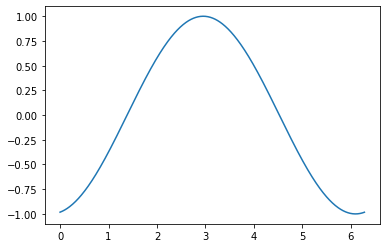

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 10))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=20, blit=True, save_count=50)


ani.save("anim.gif", writer="imagemagick")

#plt.show()

出来上がったアニメメーションGIFファイル
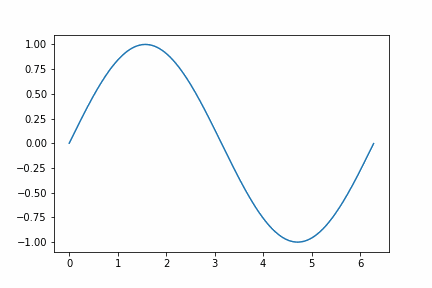

FuncAnimationはlineという変数を返す関数を引数にしてるがこのlineは[matplotliv.pyplot.plot()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib-pyplot-plot)の返り値をもとにしている。
plot()のリファランスによると、は[matplotlib.lines.Line2D](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)クラスのリストを返すとのこと。

どうやら以下の構文(,付き代入)は渡されたリストの要素のLine2Dクラスのインスタンスをlineに渡すようである。

``` python
line, = ax.plot(x, np.sin(x))
```


line2Dをもう少し調べてみる


In [2]:
line

In [3]:
#dir(line)

クラスは[matplotlib.lines.Line2D](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)でx,yのデータを持っている模様
[get_xdata()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.get_xdata),[get_ydata()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.get_xydata)を試してみる

In [4]:
x=line.get_xdata()
y=line.get_ydata()

In [5]:
type(x)

numpy.ndarray

In [6]:
x.ndim

1

In [7]:
x.shape

(629,)

In [8]:
type(y)

numpy.ndarray

In [9]:
y.ndim

1

In [10]:
y.shape

(629,)

xdata,ydataは629個の1次元ndarrayであることがわかった。(ある程度読めていただが、、)

### 磁場のプロット

2次元ベクトル場を表現するのに[pyplot.quiver()メソッド](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.quiver.html?highlight=pyplot%20quiver#matplotlib.pyplot.quiver)を使ってみる。

[numpy.meshgrid()](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html?highlight=numpy%20meshgrid#numpy.meshgrid)を使って生成した配列を使うとスマートに記述できる。

In [11]:
n=10

x,y =np.meshgrid(np.linspace(-0.5,0.5,n),np.linspace(-0.5,0.5,n))

In [12]:
print(x)
print()
print(y)

[[-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]
 [-0.5        -0.38888889 -0.27777778 -0.16666667 -0.05555556  0.05555556
   0.16666667  0.27777778  0.38888889  0.5       ]


In [13]:
I=2.0
r=np.sqrt(x**2+y**2)
theta=np.arctan2(y,x)
u=-I*np.sin(theta)/(2.0*np.pi*r)
v=I*np.cos(theta)/(2.0*np.pi*r)


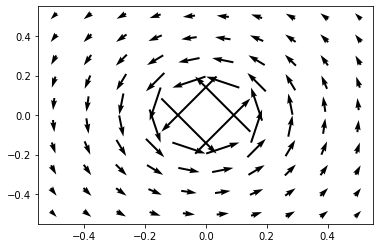

In [14]:
qv=plt.quiver(x,y,u,v,pivot='mid')

In [15]:
type(qv)

matplotlib.quiver.Quiver

プロットは[matplotlib.quiver.Quiverクラス](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.quiver.Quiver.html#matplotlib-quiver-quiver)として生成される模様

In [16]:
#dir(qv)

アニメーションにするためには先述のaxes.plot()を[axes.quiver()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.quiver.html?highlight=axes%20quiver#matplotlib.axes.Axes.quiver)にすればできそう。

FuncAnimation()で指定する関数は[matplotlib.artist.Artistクラス](https://matplotlib.org/3.2.1/apiの返り値となる関数である必要があるようでmatplotlib.quiver.Quiverクラスをそのままreturnしてもエラーになる。

調べるとmatplotlib.quiver.Quiverクラスは[matplotlib.collections.PolyCollectionクラス](https://matplotlib.org/3.2.1/api/collections_api.html#matplotlib.collections.PolyCollection)を継承しているようであり、その
[findobj()メソッド](https://matplotlib.org/3.2.1/api/collections_api.html#matplotlib.collections.PolyCollection.findobj)により、目的とするリストを得ることができた。

再描画するためには

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


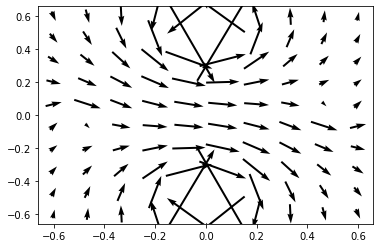

In [17]:

I=0.5 #電流振幅
n=10  #分解能

x,y =np.meshgrid(np.linspace(-0.6,0.6,n),np.linspace(-0.6,0.6,n))
r=np.sqrt(x**2+y**2)
theta=np.arctan2(y,x)


#a相pogitive 極座標変換 (0.0,0.5)
r_ap=np.sqrt((x-0.0)**2+(y-0.5)**2) 
theta_ap=np.arctan2((y-0.5),(x-0.0))

#a相negative 極座標変換 (0.0,-0.5)
r_an=np.sqrt((x-0.0)**2+(y+0.5)**2)
theta_an=np.arctan2((y+0.5),(x-0.0))

#b相pogitive 極座標変換 (-0.5,0.0)
r_bp=np.sqrt((x+0.5)**2+(y-0.0)**2)
theta_bp=np.arctan2((y+0.0),(x+0.5))

#b相negative 極座標変換 (0.5,0.0)
r_bn=np.sqrt((x-0.5)**2+(y-0.0)**2)
theta_bn=np.arctan2((y-0.0),(x-0.5))


fig, ax = plt.subplots()

#quiverクラス生成
u=-I*np.sin(theta)/(2.0*np.pi*r)
v=I*np.cos(theta)/(2.0*np.pi*r)
qv=ax.quiver(x,y,u,v,pivot='mid')

#初期化関数
def init():  # only required for blitting to give a clean slate.
    Ia=I*np.cos(2.0*2.0*np.pi*0/100.0)
    Ib=I*np.sin(2.0*2.0*np.pi*0/100.0)
    
    u=-Ia*np.sin(theta_ap)/(2.0*np.pi*r_ap)+Ia*np.sin(theta_an)/(2.0*np.pi*r_an)-Ib*np.sin(theta_bp)/(2.0*np.pi*r_bp)+Ib*np.sin(theta_bn)/(2.0*np.pi*r_bn)
    v=Ia*np.cos(theta_ap)/(2.0*np.pi*r_ap)-Ia*np.cos(theta_an)/(2.0*np.pi*r_an)+Ib*np.cos(theta_bp)/(2.0*np.pi*r_bp)-Ib*np.cos(theta_bn)/(2.0*np.pi*r_bn)
    qv.set_UVC(u,v)
    return qv.findobj()

#アニメーション記述関数
def animate(i):
    Ia=I*np.cos(2.0*2.0*np.pi*i/100.0)
    Ib=I*np.sin(2.0*2.0*np.pi*i/100.0)
    
    u=-Ia*np.sin(theta_ap)/(2.0*np.pi*r_ap)+Ia*np.sin(theta_an)/(2.0*np.pi*r_an)-Ib*np.sin(theta_bp)/(2.0*np.pi*r_bp)+Ib*np.sin(theta_bn)/(2.0*np.pi*r_bn)
    v=Ia*np.cos(theta_ap)/(2.0*np.pi*r_ap)-Ia*np.cos(theta_an)/(2.0*np.pi*r_an)+Ib*np.cos(theta_bp)/(2.0*np.pi*r_bp)-Ib*np.cos(theta_bn)/(2.0*np.pi*r_bn)
    qv.set_UVC(u,v)
    return qv.findobj()

#FuncAnimationクラスの生成
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=20, blit=True, save_count=50)

#アニメーションの保存
ani.save("pole.gif", writer="imagemagick")

#plt.show()

In [18]:
qv.findobj()

↑これを見るとfindobj()を返すかわりに

``` python
return　[qv]
```
としてもよかったかも、、、  

とりあえず作成したアニメーション回転磁界のつもり

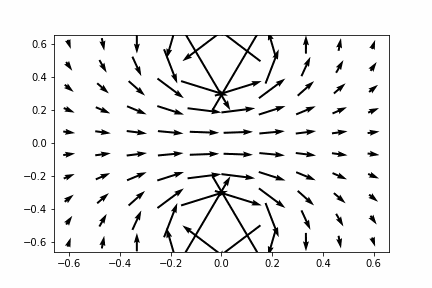

三相交流による回転磁界も

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


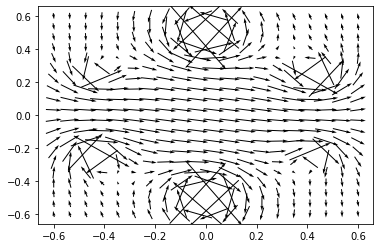

In [19]:
I=0.5 #電流振幅
n=20  #分解能

x,y =np.meshgrid(np.linspace(-0.6,0.6,n),np.linspace(-0.6,0.6,n))
r=np.sqrt(x**2+y**2)
theta=np.arctan2(y,x)


#u相pogitive 極座標変換 (0.0,0.5)
r_up=np.sqrt((x-0.0)**2+(y-0.5)**2) 
theta_up=np.arctan2((y-0.5),(x-0.0))

#u相negative 極座標変換 (0.0,-0.5)
r_un=np.sqrt((x-0.0)**2+(y+0.5)**2)
theta_un=np.arctan2((y+0.5),(x-0.0))

rt3=np.sqrt(3.0)

#v相pogitive 極座標変換 
r_vp=np.sqrt((x+rt3/4.0)**2+(y+0.25)**2)
theta_vp=np.arctan2((y+0.25),(x+rt3/4.00))

#v相negative 極座標変換
r_vn=np.sqrt((x-rt3/4.0)**2+(y-0.25)**2)
theta_vn=np.arctan2((y-0.25),(x-rt3/4.0))


#w相pogitive 極座標変換
r_wp=np.sqrt((x-rt3/4.0)**2+(y+0.25)**2)
theta_wp=np.arctan2((y+0.25),(x-rt3/4.0))

#w相negative 極座標変換
r_wn=np.sqrt((x+rt3/4.0)**2+(y-0.25)**2)
theta_wn=np.arctan2((y-0.25),(x+rt3/4.0))



fig, ax = plt.subplots()

#quiverクラス生成
u=-I*np.sin(theta)/(2.0*np.pi*r)
v=I*np.cos(theta)/(2.0*np.pi*r)
qv=ax.quiver(x,y,u,v,pivot='mid')

#初期化関数
def init():  # only required for blitting to give a clean slate.
    Iu=I*np.cos(2.0*2.0*np.pi*0/100.0)
    Iv=I*np.cos(2.0*2.0*np.pi*0/100.0-(2.0/3.0)*np.pi)
    Iw=I*np.cos(2.0*2.0*np.pi*0/100.0-(4.0/3.0)*np.pi)
    
    u_u=-Iu*np.sin(theta_up)/(2.0*np.pi*r_up)+Iu*np.sin(theta_un)/(2.0*np.pi*r_un)
    v_u= Iu*np.cos(theta_up)/(2.0*np.pi*r_up)-Iu*np.cos(theta_un)/(2.0*np.pi*r_un)
    u_v=-Iv*np.sin(theta_vp)/(2.0*np.pi*r_vp)+Iv*np.sin(theta_vn)/(2.0*np.pi*r_vn)
    v_v= Iv*np.cos(theta_vp)/(2.0*np.pi*r_vp)-Iv*np.cos(theta_vn)/(2.0*np.pi*r_vn)
    u_w=-Iw*np.sin(theta_wp)/(2.0*np.pi*r_wp)+Iw*np.sin(theta_wn)/(2.0*np.pi*r_wn)
    v_w= Iw*np.cos(theta_wp)/(2.0*np.pi*r_wp)-Iw*np.cos(theta_wn)/(2.0*np.pi*r_wn)
     
    u=u_u+u_v+u_w
    v=v_u+v_v+v_w
    
    qv.set_UVC(u,v)
    return qv.findobj()

#アニメーション記述関数
def animate(i):
    Iu=I*np.cos(2.0*2.0*np.pi*i/100.0)
    Iv=I*np.cos(2.0*2.0*np.pi*i/100.0-(2.0/3.0)*np.pi)
    Iw=I*np.cos(2.0*2.0*np.pi*i/100.0-(4.0/3.0)*np.pi)
    
    u_u=-Iu*np.sin(theta_up)/(2.0*np.pi*r_up)+Iu*np.sin(theta_un)/(2.0*np.pi*r_un)
    v_u= Iu*np.cos(theta_up)/(2.0*np.pi*r_up)-Iu*np.cos(theta_un)/(2.0*np.pi*r_un)
    u_v=-Iv*np.sin(theta_vp)/(2.0*np.pi*r_vp)+Iv*np.sin(theta_vn)/(2.0*np.pi*r_vn)
    v_v= Iv*np.cos(theta_vp)/(2.0*np.pi*r_vp)-Iv*np.cos(theta_vn)/(2.0*np.pi*r_vn)
    u_w=-Iw*np.sin(theta_wp)/(2.0*np.pi*r_wp)+Iw*np.sin(theta_wn)/(2.0*np.pi*r_wn)
    v_w= Iw*np.cos(theta_wp)/(2.0*np.pi*r_wp)-Iw*np.cos(theta_wn)/(2.0*np.pi*r_wn)
     
    u=u_u+u_v+u_w
    v=v_u+v_v+v_w
    
    qv.set_UVC(u,v)
    return qv.findobj()


#FuncAnimationクラスの生成
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=20, blit=True, save_count=50)

#アニメーションの保存
ani.save("pole.gif", writer="imagemagick")

#plt.show()

出来上がったアニメーション  
３相２極（機械角＝電気角）

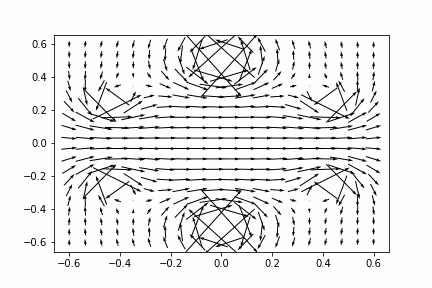